Test notebook

In [1]:
# Dependencies and Setup
import missingno as msno
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import LinearLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.stats import linregress
import scipy.stats as st
import sys
import json
import requests

# Load the data file, read and display it with Pandas
q036_data = Path("Resources/Extra/Q036.csv")

# Read and store into Pandas DataFrames
q036_df = pd.read_csv(q036_data)
q036_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,VALUE,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,VALUE,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Income,"Less than $15,000",INC,INCLESS15
4,2011,2011,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,NaN,OWS,OWS1,Q036,VALUE,59,Age (years),35 - 44,AGEYR,AGEYR3544


In [2]:
q036_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [3]:
# Trim the columns of data to the one we need
q036_df_trim = q036_df.drop(['Datasource','Class', 'Topic','Data_Value_Unit', 'Data_Value_Type','Data_Value_Alt','Data_Value_Footnote_Symbol','Data_Value_Footnote','Total', 'DataValueTypeID'], axis=1)
q036_df_trim

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,35.2,30.7,40.0,598.0,25 - 34,...,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Percent of adults aged 18 years and older who ...,35.4,33.0,37.9,6649.0,NaN,...,American Indian/Alaska Native,NaN,OWS,OWS1,Q036,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Percent of adults aged 18 years and older who ...,32.1,21.6,44.8,109.0,NaN,...,Other,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Percent of adults aged 18 years and older who ...,32.3,31.4,33.2,49598.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"Less than $15,000",INC,INCLESS15
4,2011,2011,US,National,Percent of adults aged 18 years and older who ...,29.9,29.2,30.6,60254.0,35 - 44,...,NaN,NaN,OWS,OWS1,Q036,59,Age (years),35 - 44,AGEYR,AGEYR3544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18112,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.7,32.0,39.6,959.0,NaN,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Education,High school graduate,EDU,EDUHSGRAD
18113,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,32.8,30.9,34.7,3356.0,NaN,...,Non-Hispanic White,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18114,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,NaN,NaN,NaN,NaN,NaN,...,Asian,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Race/Ethnicity,Asian,RACE,RACEASN
18115,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.2,30.6,40.0,450.0,35 - 44,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Age (years),35 - 44,AGEYR,AGEYR3544


In [4]:
# Remove the names of the territories
q036_df_trim_filtered = q036_df_trim[~q036_df_trim['LocationDesc'].str.contains('Guam|Virgin Islands|Puerto Rico')]

#remove NA Data value
q036_df_trim_cleaned = q036_df_trim_filtered.dropna(subset=['Data_Value'])
q036_df_trim_cleaned

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,35.2,30.7,40.0,598.0,25 - 34,...,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,1,Age (years),25 - 34,AGEYR,AGEYR2534
1,2011,2011,US,National,Percent of adults aged 18 years and older who ...,35.4,33.0,37.9,6649.0,NaN,...,American Indian/Alaska Native,NaN,OWS,OWS1,Q036,59,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA
2,2011,2011,RI,Rhode Island,Percent of adults aged 18 years and older who ...,32.1,21.6,44.8,109.0,NaN,...,Other,"(41.708280193, -71.522470314)",OWS,OWS1,Q036,44,Race/Ethnicity,Other,RACE,RACEOTH
3,2011,2011,US,National,Percent of adults aged 18 years and older who ...,32.3,31.4,33.2,49598.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"Less than $15,000",INC,INCLESS15
4,2011,2011,US,National,Percent of adults aged 18 years and older who ...,29.9,29.2,30.6,60254.0,35 - 44,...,NaN,NaN,OWS,OWS1,Q036,59,Age (years),35 - 44,AGEYR,AGEYR3544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18111,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,39.0,33.1,45.3,305.0,25 - 34,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Age (years),25 - 34,AGEYR,AGEYR2534
18112,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.7,32.0,39.6,959.0,NaN,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Education,High school graduate,EDU,EDUHSGRAD
18113,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,32.8,30.9,34.7,3356.0,NaN,...,Non-Hispanic White,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
18115,2022,2022,WY,Wyoming,Percent of adults aged 18 years and older who ...,35.2,30.6,40.0,450.0,35 - 44,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,56,Age (years),35 - 44,AGEYR,AGEYR3544


In [5]:
#filter only National data
q036_natl_df = q036_df_trim_cleaned[q036_df_trim_cleaned['LocationDesc'].str.contains('National')].sort_values(by=['YearStart', 'Stratification1'])
q036_natl_df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
27,2011,2011,US,National,Percent of adults aged 18 years and older who ...,31.3,30.6,32.0,74049.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"$15,000 - $24,999",INC,INC1525
42,2011,2011,US,National,Percent of adults aged 18 years and older who ...,29.5,28.7,30.4,48943.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"$25,000 - $34,999",INC,INC2535
14,2011,2011,US,National,Percent of adults aged 18 years and older who ...,28.7,27.9,29.4,61354.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"$35,000 - $49,999",INC,INC3550
18,2011,2011,US,National,Percent of adults aged 18 years and older who ...,28.4,27.7,29.1,64688.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"$50,000 - $74,999",INC,INC5075
9,2011,2011,US,National,Percent of adults aged 18 years and older who ...,22.8,22.3,23.3,110120.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Income,"$75,000 or greater",INC,INC75PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17808,2022,2022,US,National,Percent of adults aged 18 years and older who ...,32.6,32.1,33.0,189865.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Gender,Male,GEN,MALE
17906,2022,2022,US,National,Percent of adults aged 18 years and older who ...,43.0,42.0,44.1,29914.0,NaN,...,Non-Hispanic Black,NaN,OWS,OWS1,Q036,59,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK
17904,2022,2022,US,National,Percent of adults aged 18 years and older who ...,32.5,32.1,32.8,289595.0,NaN,...,Non-Hispanic White,NaN,OWS,OWS1,Q036,59,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT
17907,2022,2022,US,National,Percent of adults aged 18 years and older who ...,35.9,35.3,36.5,105991.0,NaN,...,NaN,NaN,OWS,OWS1,Q036,59,Education,Some college or technical school,EDU,EDUCOTEC


In [6]:
q036_df_sorted = q036_df_trim_cleaned.sort_values(by=['YearStart', 'StratificationCategory1', 'Stratification1', 'LocationDesc'])
q036_df_sorted

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
1410,2011,2011,AL,Alabama,Percent of adults aged 18 years and older who ...,16.3,12.6,20.9,356.0,18 - 24,...,NaN,"(32.840571122, -86.631860762)",OWS,OWS1,Q036,1,Age (years),18 - 24,AGEYR,AGEYR1824
1313,2011,2011,AK,Alaska,Percent of adults aged 18 years and older who ...,19.8,13.4,28.4,212.0,18 - 24,...,NaN,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,2,Age (years),18 - 24,AGEYR,AGEYR1824
53,2011,2011,AZ,Arizona,Percent of adults aged 18 years and older who ...,18.7,12.7,26.7,240.0,18 - 24,...,NaN,"(34.86597028, -111.763811277)",OWS,OWS1,Q036,4,Age (years),18 - 24,AGEYR,AGEYR1824
775,2011,2011,AR,Arkansas,Percent of adults aged 18 years and older who ...,23.0,16.1,31.9,136.0,18 - 24,...,NaN,"(34.748650124, -92.274490743)",OWS,OWS1,Q036,5,Age (years),18 - 24,AGEYR,AGEYR1824
1034,2011,2011,CA,California,Percent of adults aged 18 years and older who ...,14.5,12.0,17.4,902.0,18 - 24,...,NaN,"(37.638640123, -120.999999538)",OWS,OWS1,Q036,6,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16589,2022,2022,VA,Virginia,Percent of adults aged 18 years and older who ...,35.2,33.8,36.6,9378.0,NaN,...,NaN,"(37.54268067400045, -78.45789046299967)",OWS,OWS1,Q036,51,Total,Total,OVR,OVERALL
18032,2022,2022,WA,Washington,Percent of adults aged 18 years and older who ...,31.7,30.9,32.5,22869.0,NaN,...,NaN,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q036,53,Total,Total,OVR,OVERALL
18069,2022,2022,WV,West Virginia,Percent of adults aged 18 years and older who ...,41.0,39.3,42.8,4640.0,NaN,...,NaN,"(38.66551020200046, -80.71264013499967)",OWS,OWS1,Q036,54,Total,Total,OVR,OVERALL
18039,2022,2022,WI,Wisconsin,Percent of adults aged 18 years and older who ...,37.7,36.4,39.0,10080.0,NaN,...,NaN,"(44.39319117400049, -89.81637074199966)",OWS,OWS1,Q036,55,Total,Total,OVR,OVERALL


# Visualizations focus on a specific year, i.e., 2022

In [7]:
q036_2022 = q036_df_sorted.loc[q036_df_sorted["YearStart"] == 2022]
q036_2022

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),...,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
16607,2022,2022,AL,Alabama,Percent of adults aged 18 years and older who ...,19.8,13.9,27.4,182.0,18 - 24,...,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1,Age (years),18 - 24,AGEYR,AGEYR1824
16654,2022,2022,AK,Alaska,Percent of adults aged 18 years and older who ...,24.5,19.4,30.6,324.0,18 - 24,...,NaN,"(64.84507995700051, -147.72205903599973)",OWS,OWS1,Q036,2,Age (years),18 - 24,AGEYR,AGEYR1824
16737,2022,2022,AZ,Arizona,Percent of adults aged 18 years and older who ...,23.3,18.5,29.0,481.0,18 - 24,...,NaN,"(34.865970280000454, -111.76381127699972)",OWS,OWS1,Q036,4,Age (years),18 - 24,AGEYR,AGEYR1824
16710,2022,2022,AR,Arkansas,Percent of adults aged 18 years and older who ...,27.6,21.4,34.8,219.0,18 - 24,...,NaN,"(34.74865012400045, -92.27449074299966)",OWS,OWS1,Q036,5,Age (years),18 - 24,AGEYR,AGEYR1824
16770,2022,2022,CA,California,Percent of adults aged 18 years and older who ...,13.8,11.3,16.9,869.0,18 - 24,...,NaN,"(37.63864012300047, -120.99999953799971)",OWS,OWS1,Q036,6,Age (years),18 - 24,AGEYR,AGEYR1824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16589,2022,2022,VA,Virginia,Percent of adults aged 18 years and older who ...,35.2,33.8,36.6,9378.0,NaN,...,NaN,"(37.54268067400045, -78.45789046299967)",OWS,OWS1,Q036,51,Total,Total,OVR,OVERALL
18032,2022,2022,WA,Washington,Percent of adults aged 18 years and older who ...,31.7,30.9,32.5,22869.0,NaN,...,NaN,"(47.52227862900048, -120.47001078999972)",OWS,OWS1,Q036,53,Total,Total,OVR,OVERALL
18069,2022,2022,WV,West Virginia,Percent of adults aged 18 years and older who ...,41.0,39.3,42.8,4640.0,NaN,...,NaN,"(38.66551020200046, -80.71264013499967)",OWS,OWS1,Q036,54,Total,Total,OVR,OVERALL
18039,2022,2022,WI,Wisconsin,Percent of adults aged 18 years and older who ...,37.7,36.4,39.0,10080.0,NaN,...,NaN,"(44.39319117400049, -89.81637074199966)",OWS,OWS1,Q036,55,Total,Total,OVR,OVERALL


In [8]:
# Output the 2022 state age data
q036_2022_states_age = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "AGEYR"]
q036_2022_states_age.to_csv("Resources/Extra/q036_2022_states_age.csv", index=False)

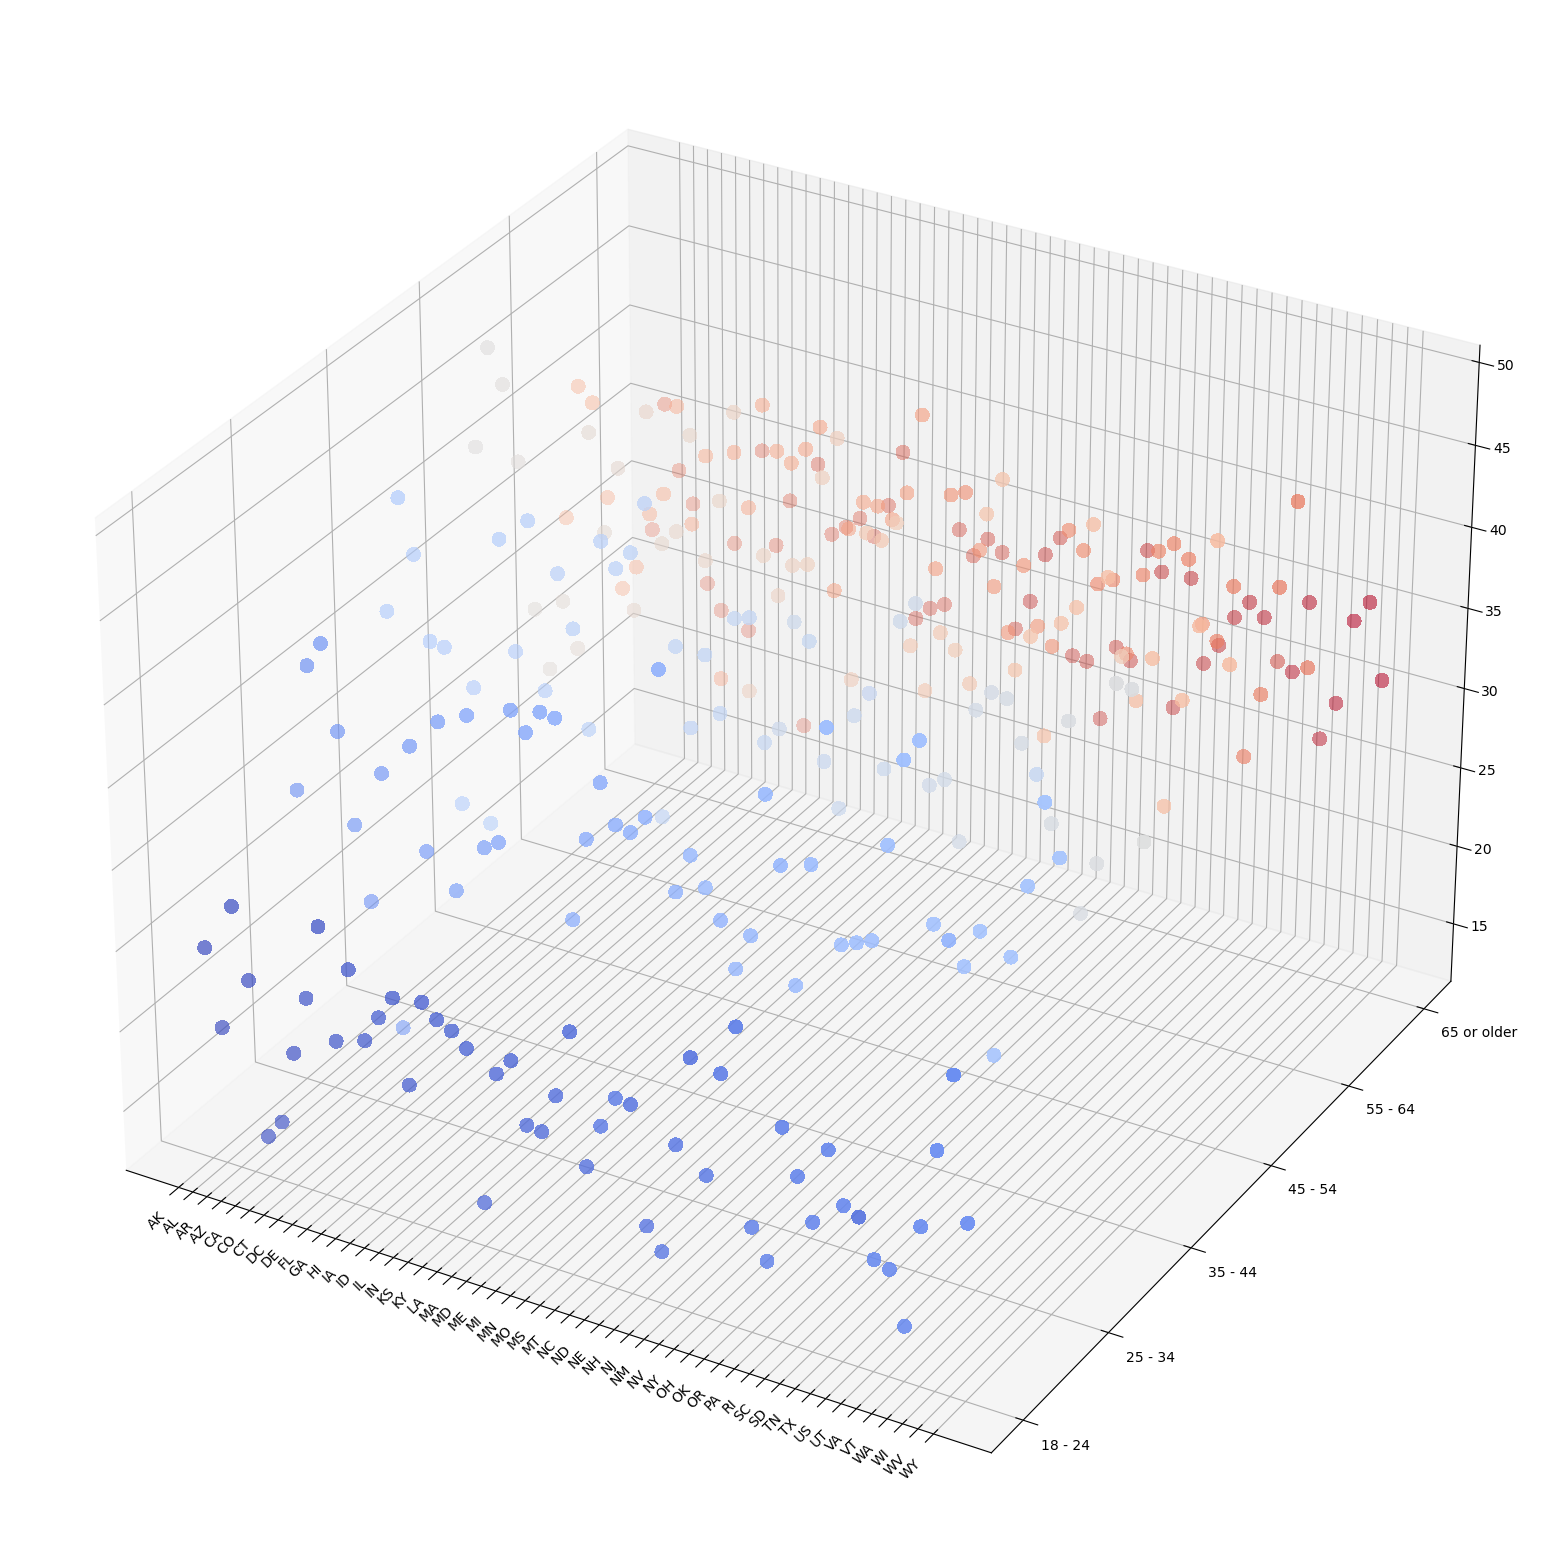

In [9]:
#3d Plot of age and state 
age = np.unique(np.array(q036_2022_states_age['Stratification1']))
state = np.unique(np.array(q036_2022_states_age['LocationAbbr']))

XUniques, Xt = np.unique(q036_2022_states_age['LocationAbbr'], return_inverse=True)
YUniques, Yt = np.unique(q036_2022_states_age['Stratification1'], return_inverse=True)
Zt = q036_2022_states_age['Data_Value']

#figsize large due to state abbr, 
fig=plt.figure(figsize=(20,20))
ax= fig.add_subplot(projection='3d')
ax.scatter(Xt, Yt, Zt, c=np.arange((len(state)*6)), cmap=cm.coolwarm,s=100, linewidth=0, antialiased=False)

ax.set_xticks(range(len(state)), labels=state, ha='right',rotation=45)
ax.set_yticks(range(len(age)), labels=age, ha='left')
plt.show()

                  

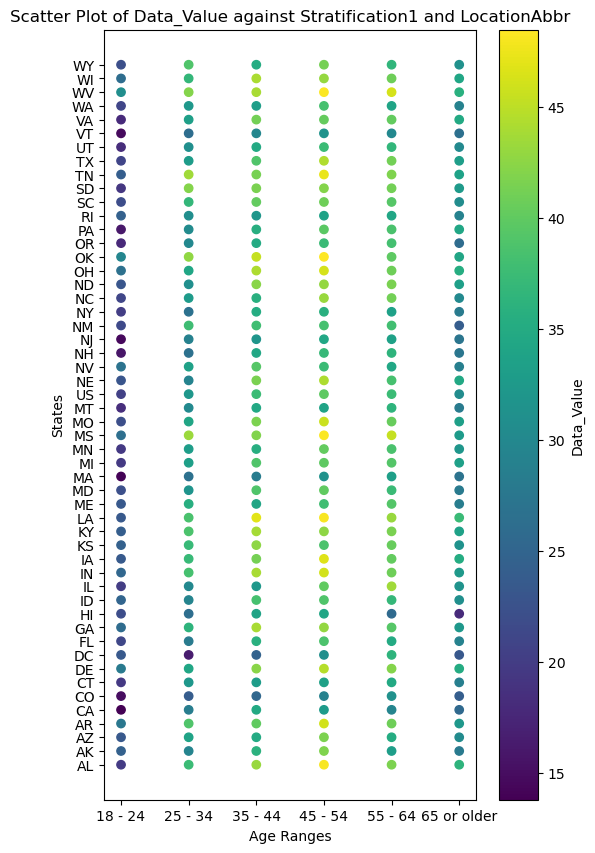

In [10]:
#Plot show age and location data by age groups
plt.figure(figsize=(6, 10))

# Create a scatter plot
plt.scatter(q036_2022_states_age["Stratification1"], q036_2022_states_age["LocationAbbr"], c=q036_2022_states_age["Data_Value"], cmap='viridis')

# Set labels and title
plt.xlabel('Age Ranges')
plt.ylabel('States')
plt.title('Scatter Plot of Data_Value against Stratification1 and LocationAbbr')

# Add colorbar
plt.colorbar(label='Data_Value')

# Show the plot
plt.show()

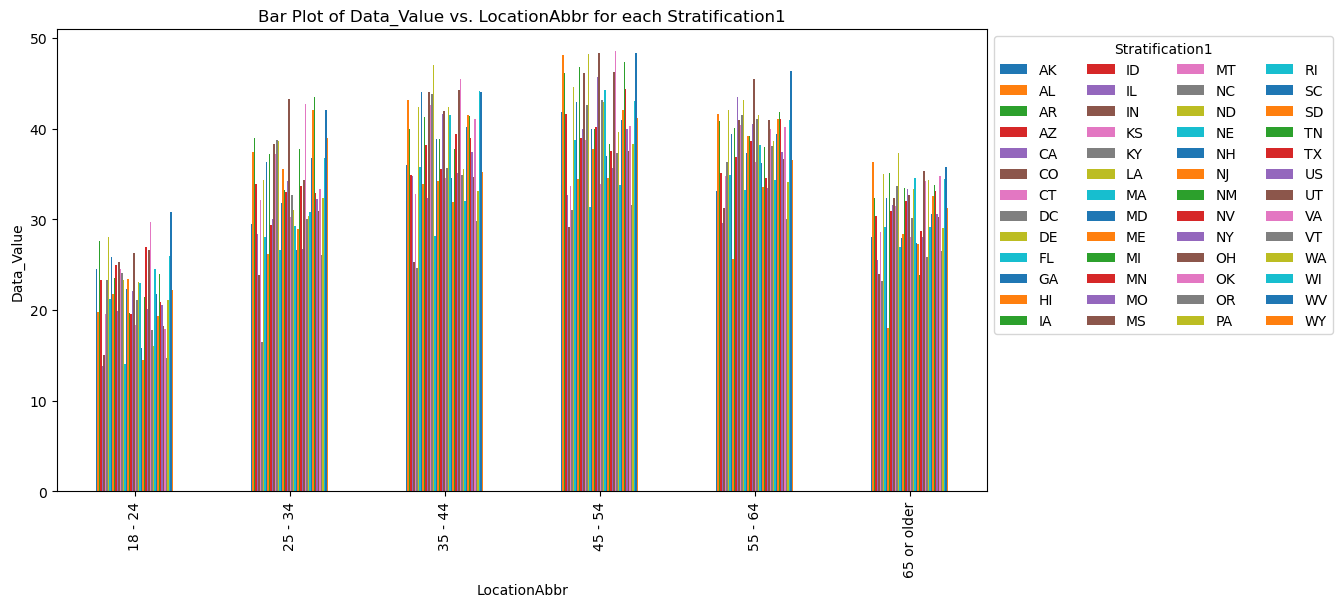

In [11]:
# Group the DataFrame by 'Stratification1' and 'LocationAbbr' and calculate the median Data_Value for each group
grouped_data = q036_2022_states_age.groupby(['Stratification1', 'LocationAbbr'])['Data_Value'].median().unstack()

# Plot a bar plot for each value in 'Stratification1'
grouped_data.plot(kind='bar', figsize=(12, 6))

# Set labels and title
plt.xlabel('LocationAbbr')
plt.ylabel('Data_Value')
plt.title('Bar Plot of Data_Value vs. LocationAbbr for each Stratification1')

# Show the plot
plt.legend(title='Stratification1', ncol = 4, bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.show()

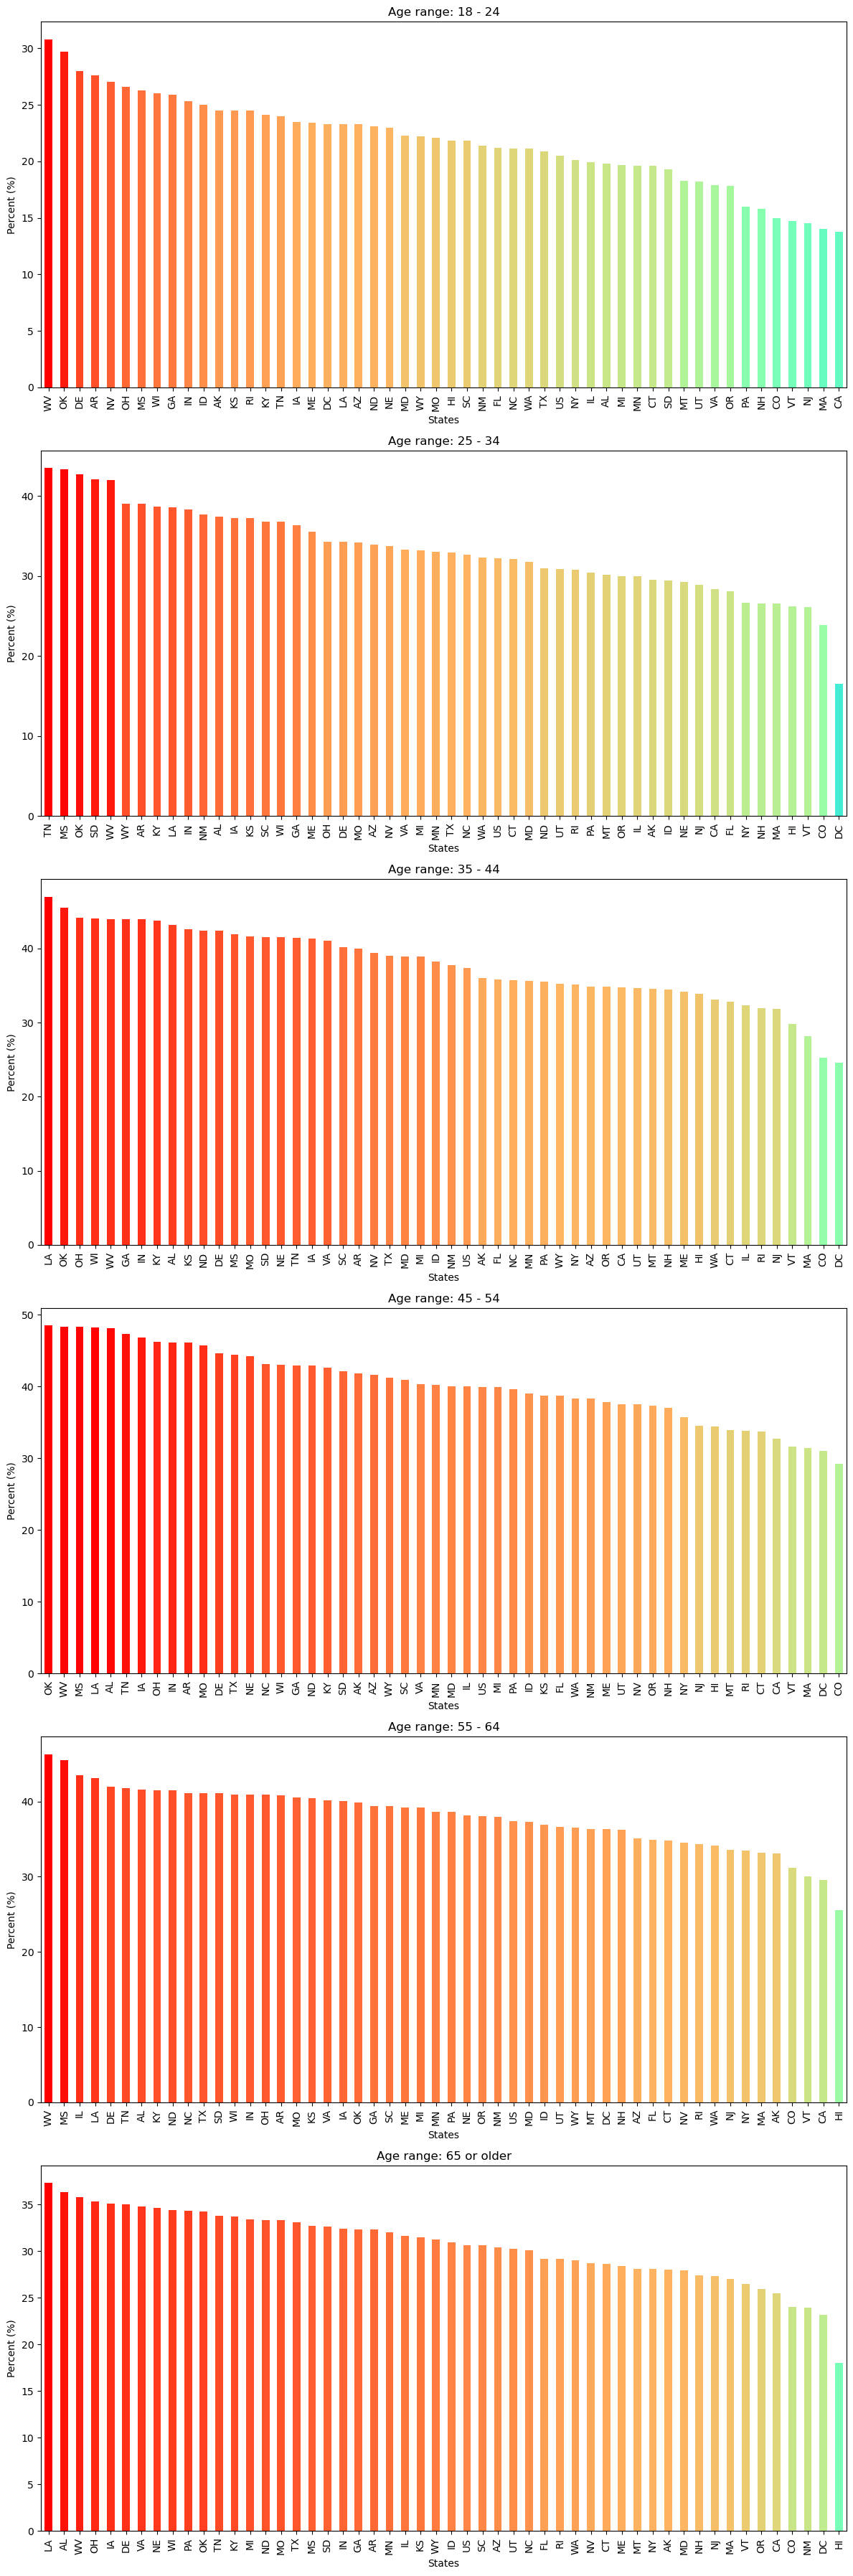

In [12]:
# Get unique values of age range
age_ranges = q036_2022_states_age["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(age_ranges)
num_cols = 1  # Each age range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique age range
for i, age in enumerate(age_ranges):
    # Filter the DataFrame for the current age range
    filtered_data = q036_2022_states_age[q036_2022_states_age["Stratification1"] == age]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current age range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    colors = plt.cm.rainbow(grouped_data.values / max(grouped_data.values))  # Use rainbow colormap
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Age range: {age}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()


In [13]:
# Output income and states data
q036_2022_states_income = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "INC"]
q036_2022_states_income.to_csv("Resources/Extra/q036_2022_states_income.csv", index=False)

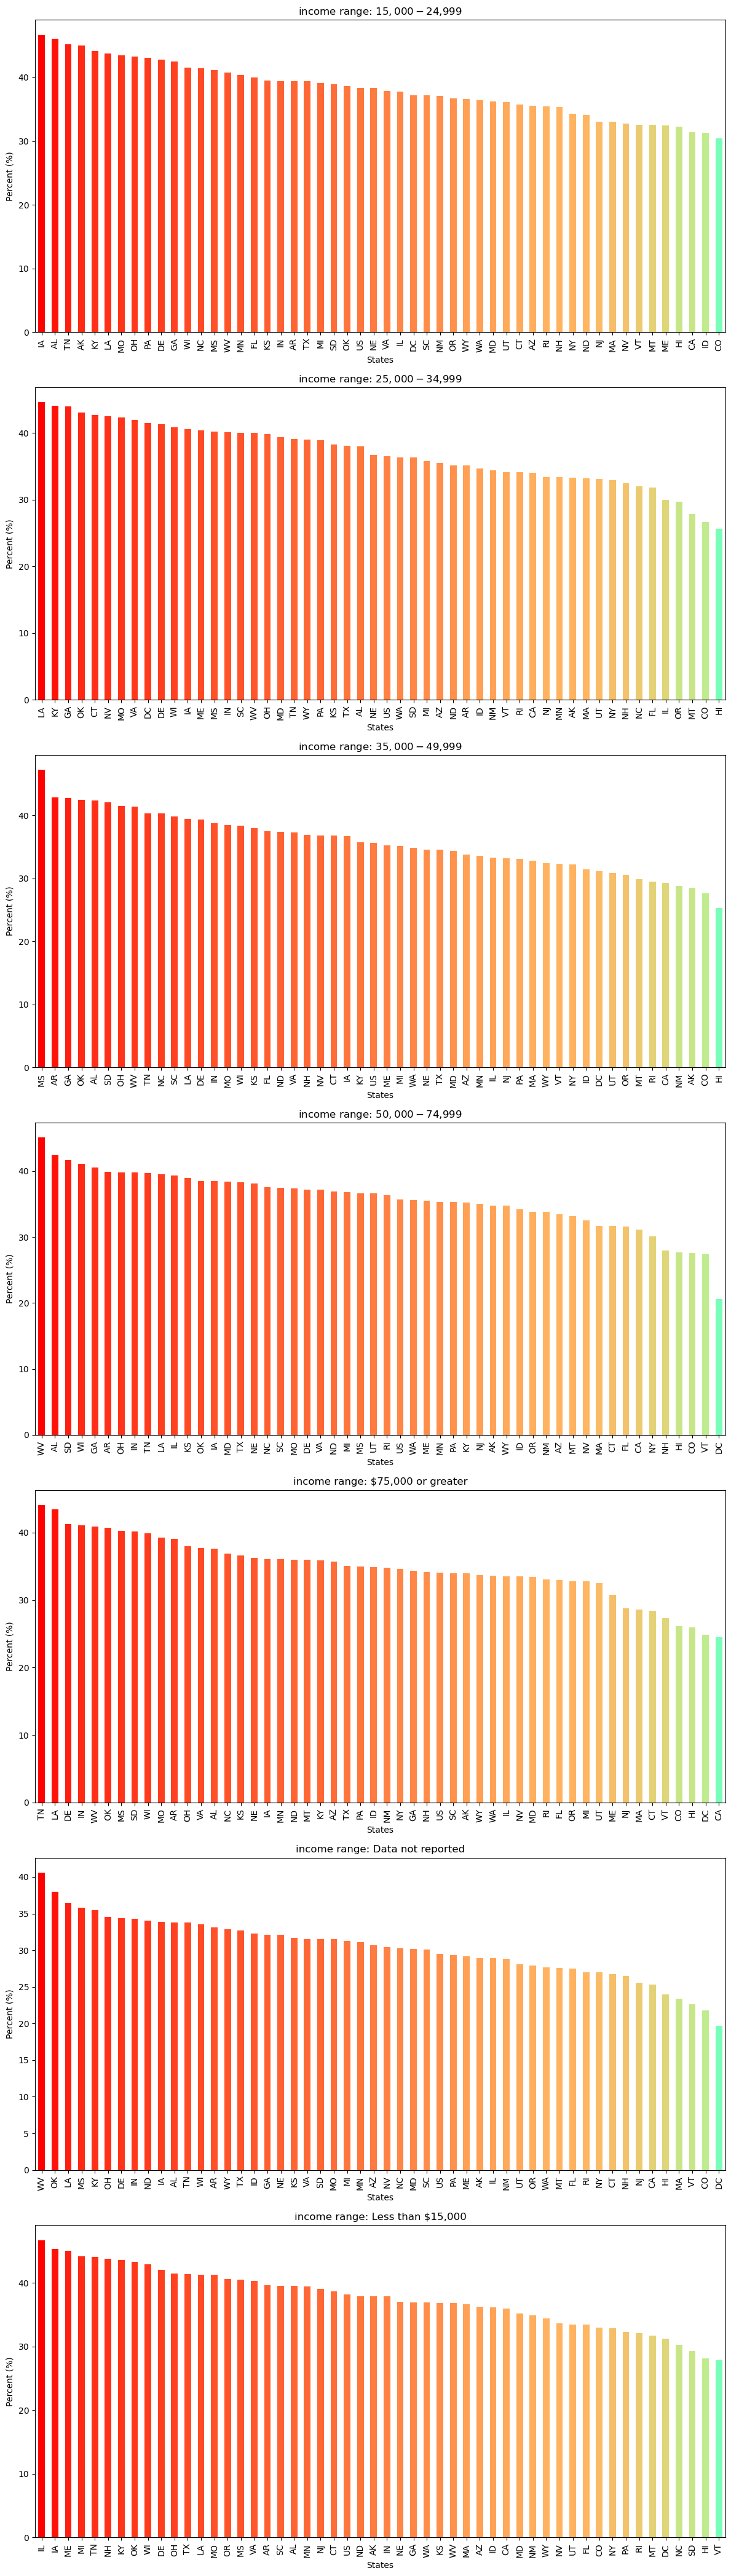

In [14]:
# Get unique values of income range
income_ranges = q036_2022_states_income["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(income_ranges)
num_cols = 1  # Each income range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique income range
for i, income in enumerate(income_ranges):
    # Filter the DataFrame for the current income range
    filtered_data = q036_2022_states_income[q036_2022_states_income["Stratification1"] == income]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current income range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'income range: {income}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
# Output Education and states data
q036_2022_states_edu = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "EDU"]
q036_2022_states_edu.to_csv("Resources/Extra/q036_2022_states_edu.csv", index=False)

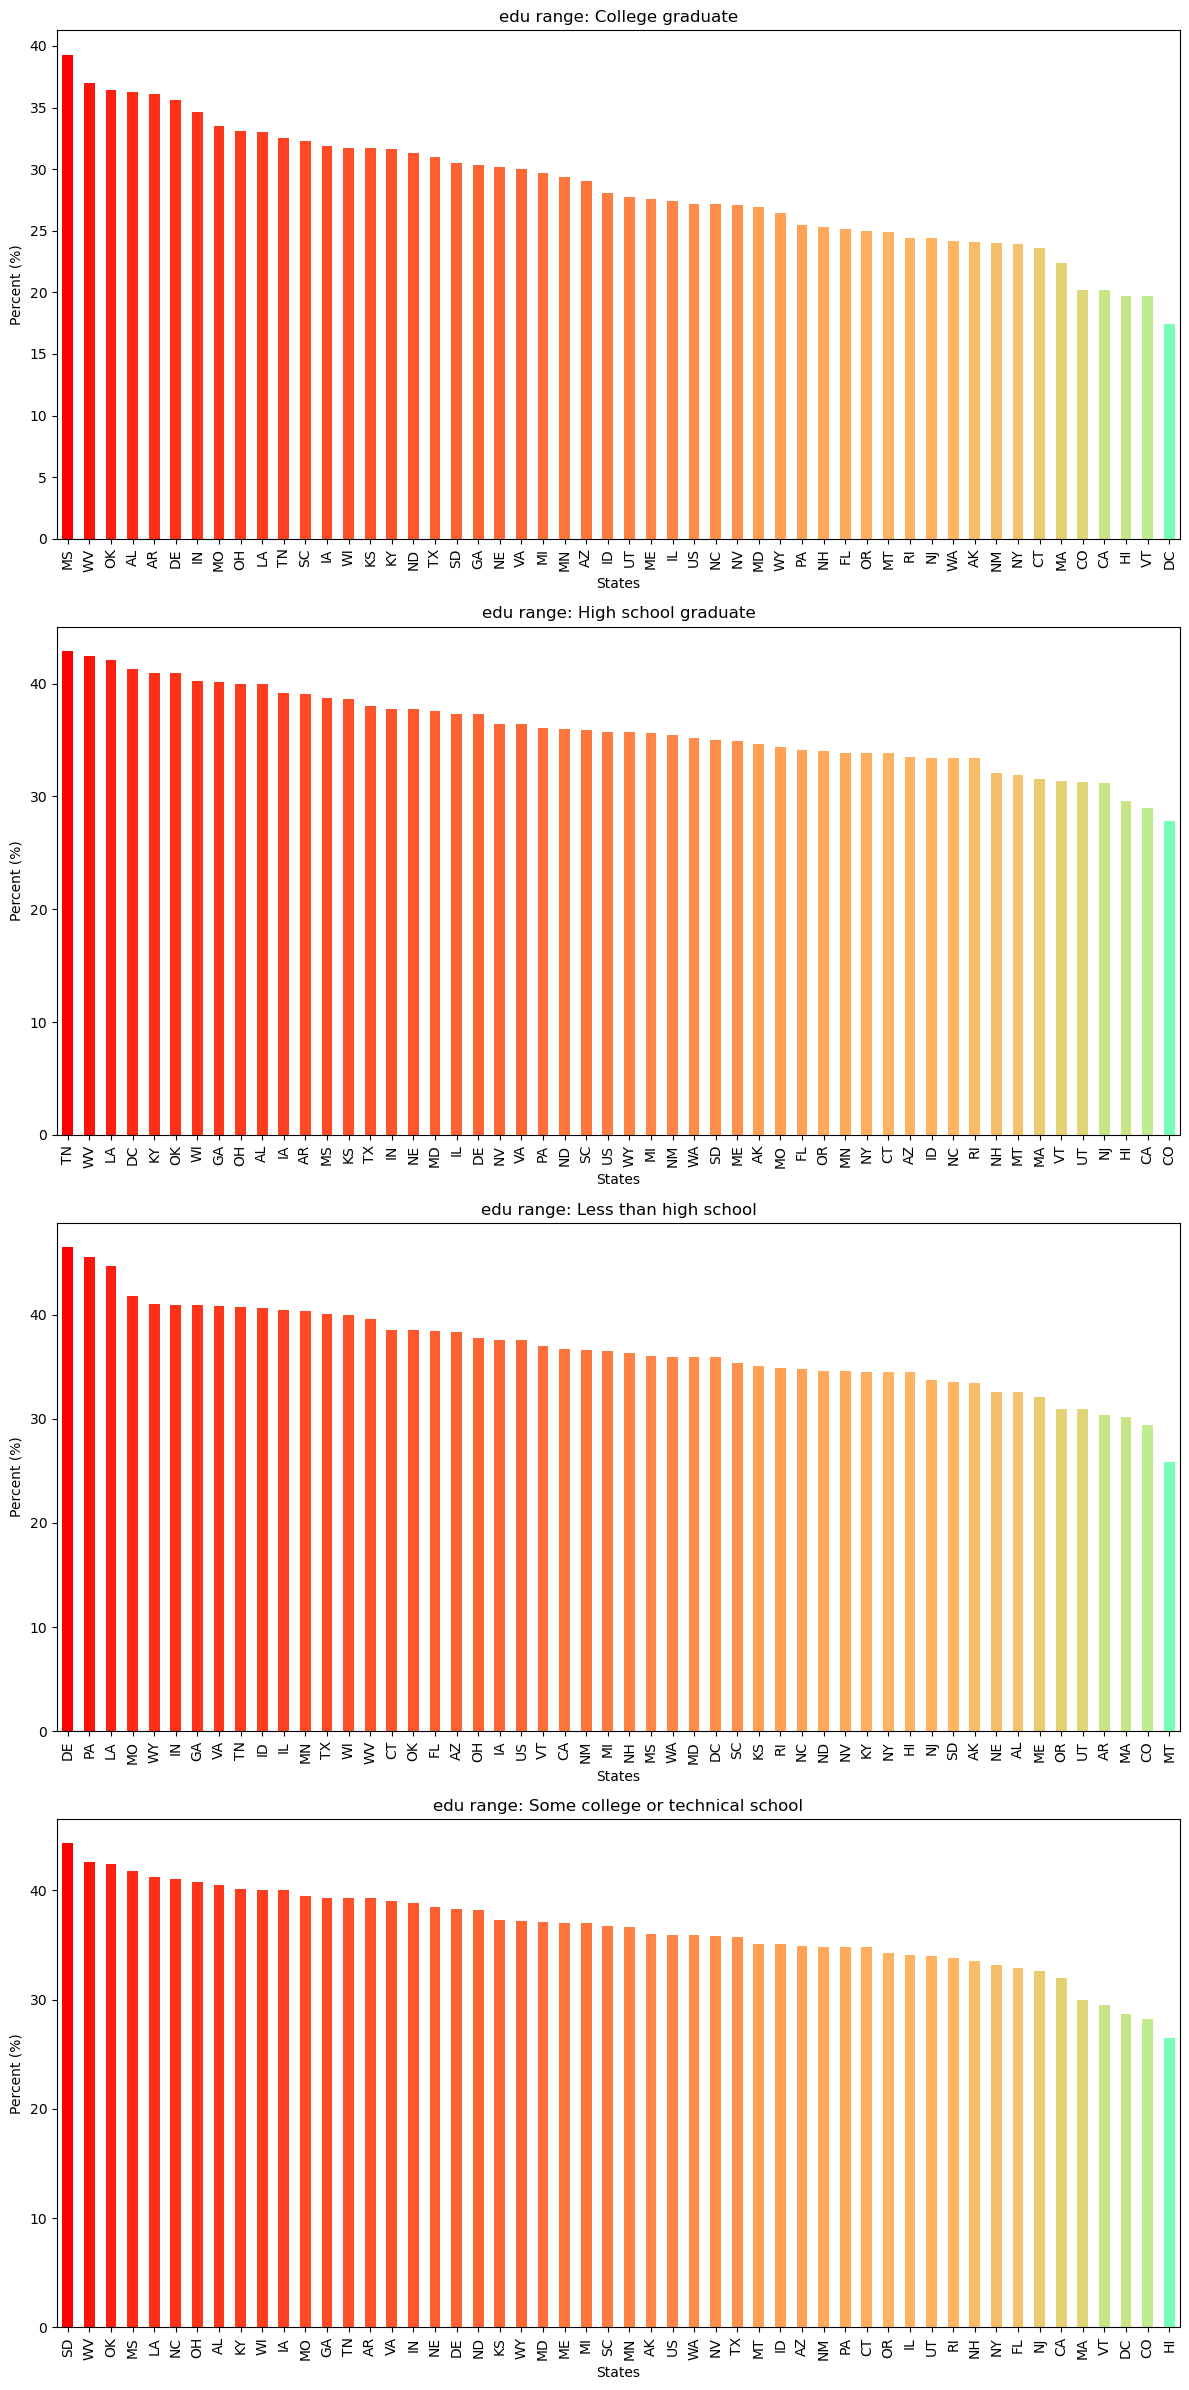

In [16]:
# Get unique values of edu range
edu_ranges = q036_2022_states_edu["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(edu_ranges)
num_cols = 1  # Each edu range will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique edu range
for i, edu in enumerate(edu_ranges):
    # Filter the DataFrame for the current edu range
    filtered_data = q036_2022_states_edu[q036_2022_states_edu["Stratification1"] == edu]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current edu range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'edu range: {edu}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [17]:
# Output race/ethnicity and state data
q036_2022_states_race = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "RACE"]
q036_2022_states_race.to_csv("Resources/Extra/q036_2022_states_race.csv", index=False)

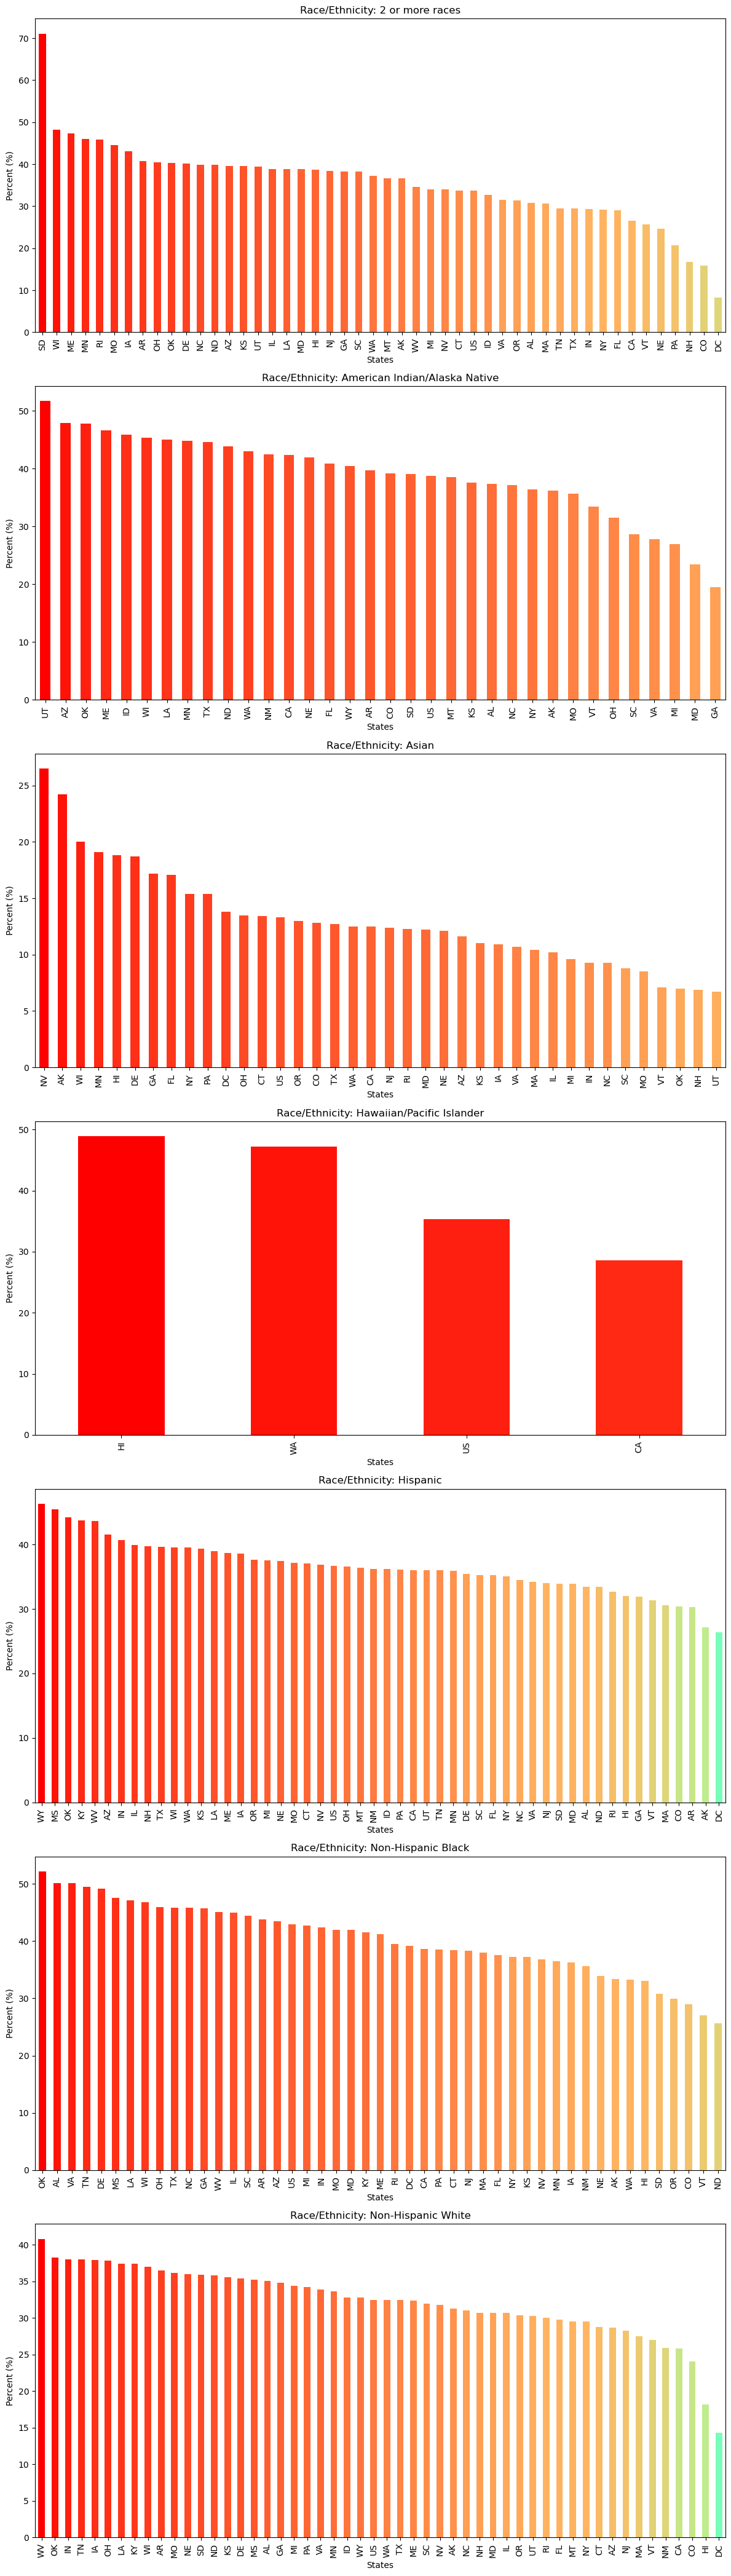

In [18]:
# Get unique values of race range
races = q036_2022_states_race["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(races)
num_cols = 1  # Each race will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique race range
for i, race in enumerate(races):
    # Filter the DataFrame for the current race 
    filtered_data = q036_2022_states_race[q036_2022_states_race["Stratification1"] == race]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current race range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Race/Ethnicity: {race}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# Output gender and state data
q036_2022_states_gen = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "GEN"]
q036_2022_states_gen.to_csv("Resources/Extra/q036_2022_states_gen.csv", index=False)

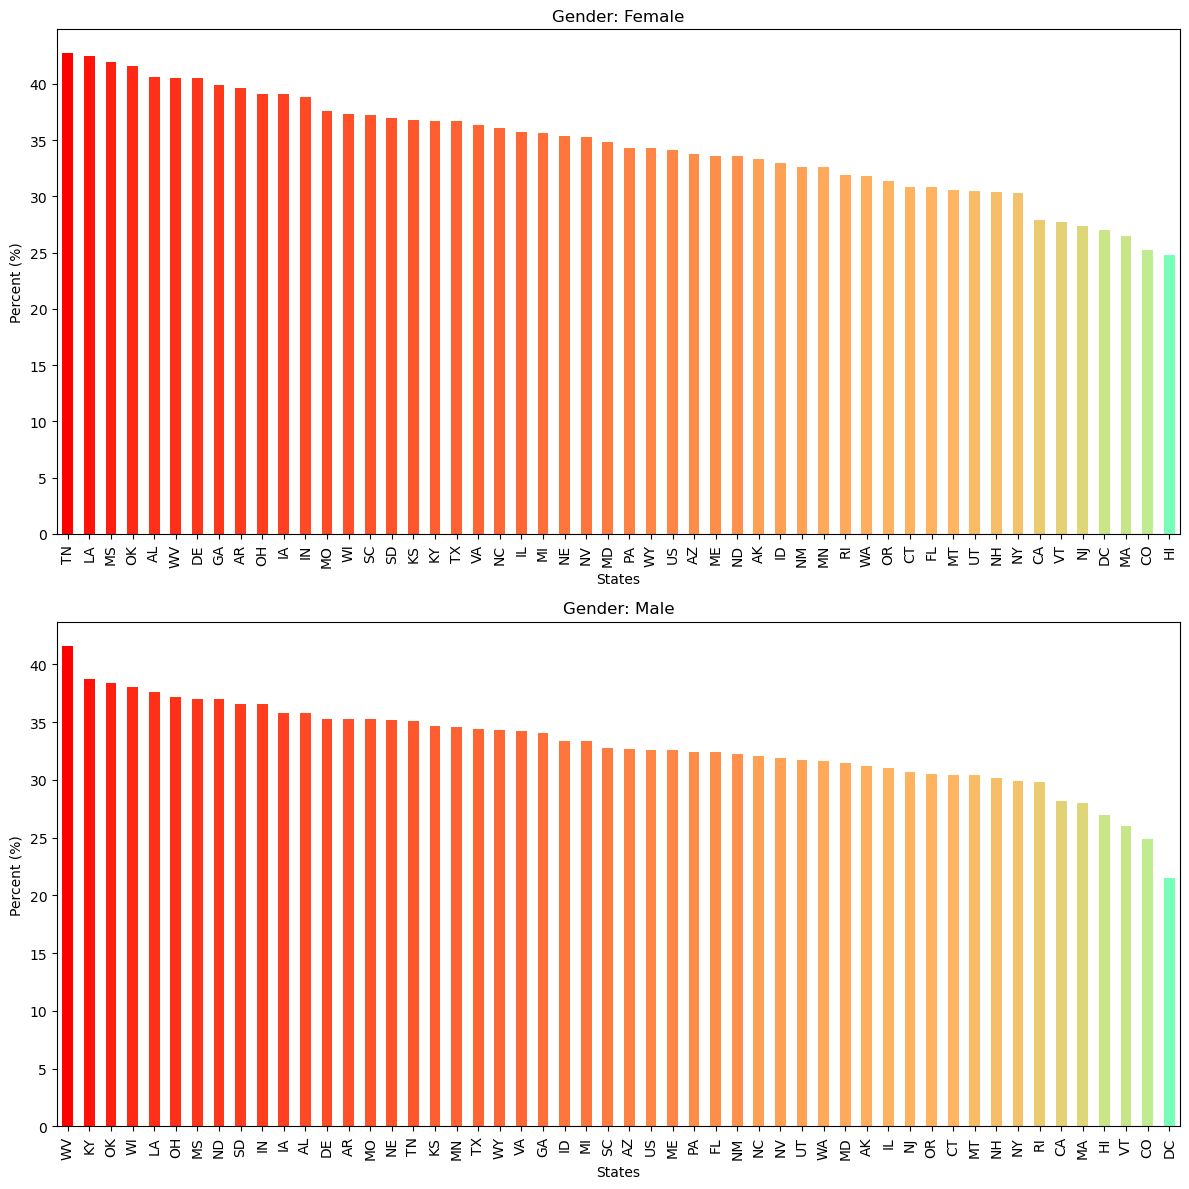

In [20]:
# Get unique values of genders
genders = q036_2022_states_gen["Stratification1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(genders)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, gen in enumerate(genders):
    # Filter the DataFrame for the current gen 
    filtered_data = q036_2022_states_gen[q036_2022_states_gen["Stratification1"] == gen]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('LocationAbbr')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'Gender: {gen}')
    ax.set_xlabel('States')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

# National level

In [21]:
# National level data for demographics
q036_natl_2022 = q036_natl_df.loc[q036_natl_df["YearStart"] == 2022].sort_values(by=['StratificationCategoryId1', 'Stratification1'])
q036_natl_2022.to_csv("Resources/Extra/q036_natl_2022.csv", index=False)

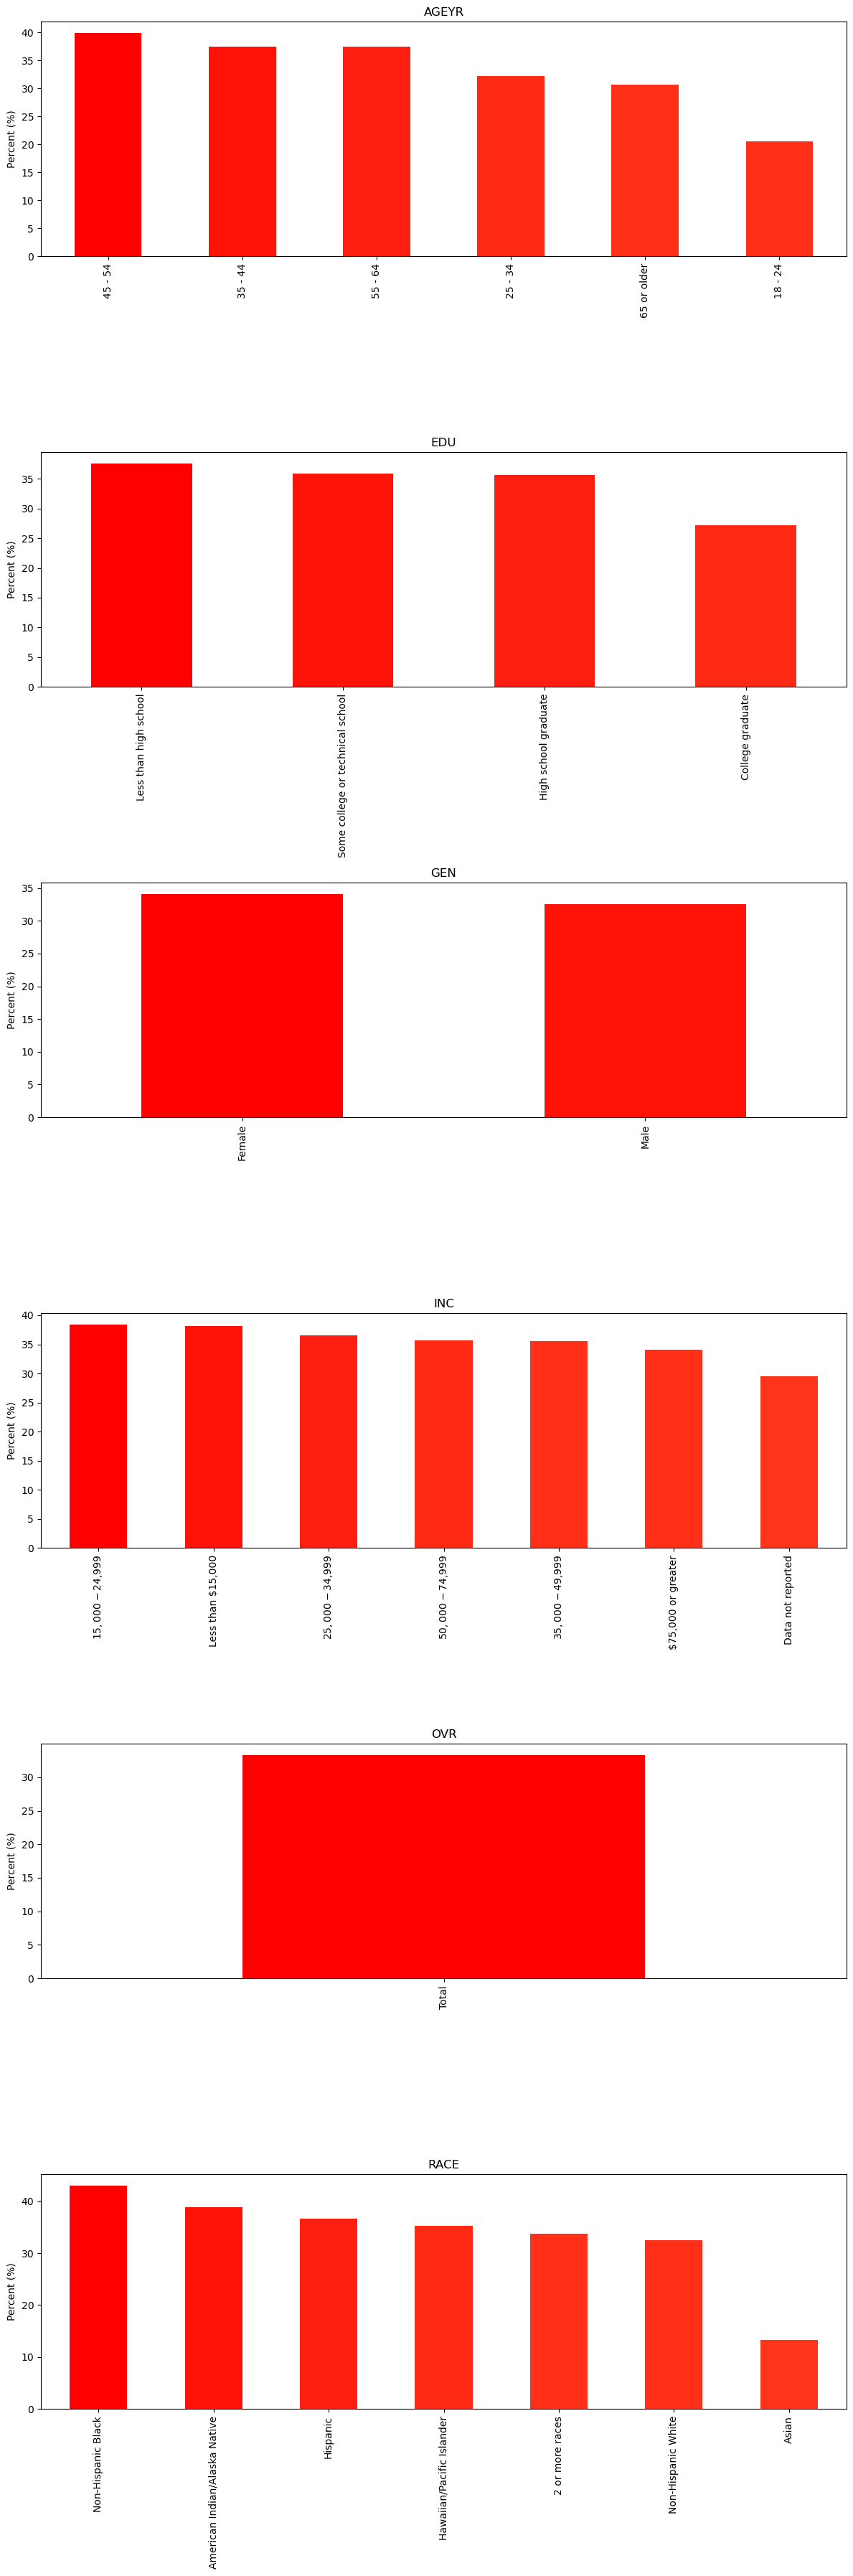

In [22]:
# Get unique values of genders
strats = q036_natl_2022["StratificationCategoryId1"].unique()

# Set the number of rows and columns for subplots
num_rows = len(strats)
num_cols = 1  # Each gen will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

# Iterate over unique gender
for i, strat in enumerate(strats):
    # Filter the DataFrame for the current gen 
    filtered_data = q036_natl_2022[q036_natl_2022["StratificationCategoryId1"] == strat]
    # Group by States, calculate the median Data_Value for each group, and sort in descending order
    grouped_data = filtered_data.groupby('Stratification1')['Data_Value'].median().sort_values(ascending=False)

    # Plot a bar plot for the current gen range value in the corresponding subplot
    ax = axes[i] if num_rows > 1 else axes
    grouped_data.plot(kind='bar', ax=ax, color=colors)
    ax.set_title(f'{strat}')
    ax.set_xlabel('')
    ax.set_ylabel('Percent (%)')

# Adjust layout
plt.tight_layout()
plt.show()

In [23]:
# Get the overall data for q036 for year of 2022
# Select specific columns by name
# Output overall data
selected_columns = ["YearStart", "LocationAbbr", "LocationDesc", "Data_Value"]
q036_2022_overall = q036_2022.loc[q036_2022["StratificationCategoryId1"] == "OVR", selected_columns]
q036_2022_overall.to_csv("Resources/Extra/q036_2022_overall.csv", index=False)